In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

import importlib
import utils.ml_utils as ml_utils

from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16

## Base run

In [2]:
# Constants
IMG_SIZE = 128 # All images in the dataset will be resized to this size
BATCH_SIZE = 32 # Batch size

In [3]:
# Read training data
train, validation, test = ml_utils.load_batched_and_resized_dataset(
    dataset_name='cats_and_dogs',
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE
)

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 2326
Class: 0 :::: Count: 1120 :::: Percentage: 48.15133276010318
Class: 1 :::: Count: 1206 :::: Percentage: 51.84866723989682

Test Data Summary
No. of examples: 2326
Class: 0 :::: Count: 1160 :::: Percentage: 49.871023215821154
Class: 1 :::: Count: 1166 :::: Percentage: 50.128976784178846


In [4]:
# Build model
model = ml_utils.build_and_compile_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,878,145
Trainable params: 2,163,457
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
# Start training
history = model.fit(
    train,
    epochs=5,
    validation_data=validation
)

Epoch 1/5
582/582 [==============================] - 78s 134ms/step - loss: 0.5232 - accuracy: 0.7400 - val_loss: 0.4243 - val_accuracy: 0.8048
Epoch 2/5
582/582 [==============================] - 63s 107ms/step - loss: 0.3936 - accuracy: 0.8238 - val_loss: 0.3713 - val_accuracy: 0.8272
Epoch 3/5
582/582 [==============================] - 62s 107ms/step - loss: 0.3537 - accuracy: 0.8427 - val_loss: 0.3576 - val_accuracy: 0.8371
Epoch 4/5
582/582 [==============================] - 62s 107ms/step - loss: 0.3317 - accuracy: 0.8535 - val_loss: 0.3338 - val_accuracy: 0.8474
Epoch 5/5
582/582 [==============================] - 62s 107ms/step - loss: 0.3181 - accuracy: 0.8582 - val_loss: 0.3237 - val_accuracy: 0.8508


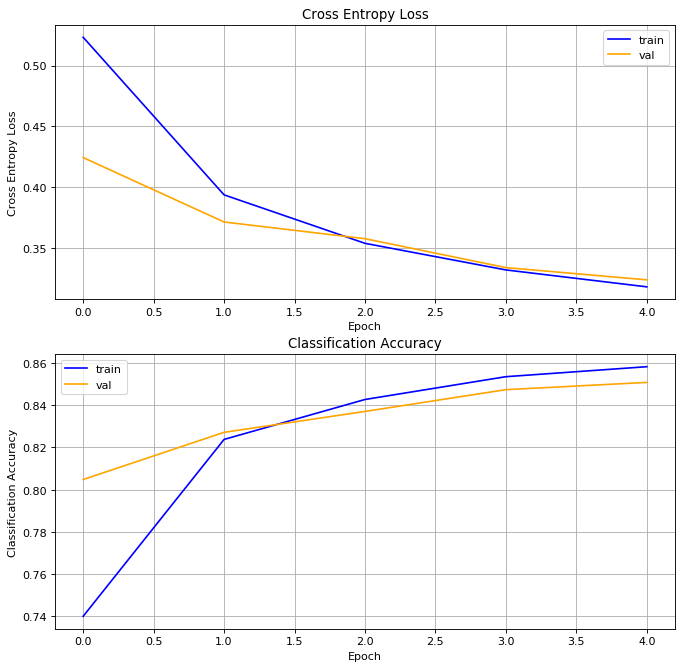

In [6]:
# Plot diagnostic learning curves
ml_utils.summarize_diagnostics(history)